
# 线性回归例子
## 银行贷款预测系统:通过贷款人的信息预测可贷款额度


In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
# 1. 读取数据
data = pd.read_csv("loan_dataset.csv")
print("数据预览：")
print(data.head())

数据预览：
   Age  Income  Credit Score    Loan Amount
0   60  108172           494  108908.615067
1   41   43580           747   46052.944181
2   53   98235           829  101094.062496
3   24   55552           608   56654.098281
4   44   83206           488   84418.835517


In [27]:
# 2. 提取特征和目标变量
X = data[["Age","Income","Credit Score"]].values
y = data["Loan Amount"].values

In [28]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# 4. 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)  # 训练模型

LinearRegression()

In [30]:
# 5. 预测
y_pred_train = model.predict(X_train)  # 训练集预测
y_pred_test = model.predict(X_test)    # 测试集预测
print('训练集预测结果：', y_pred_train)
print('训练集实际结果：', y_train)
print('测试集预测结果：', y_pred_test)
print('测试集实际结果：', y_test)


训练集预测结果： [116215.19170024  85196.45658843  62541.35909008  83249.56794476
  58236.76524661 112143.75217309  67375.05212915 104601.02931715
 112888.2474157   62320.04566504 106535.93042455  99289.0382732
  87578.4156303   74761.35861178 110984.65347044 109827.54837035
  95909.78017551  51046.45828892  70000.85497099  31942.70884752
  89511.33206566  72357.9695851   46067.75996375 119889.98460273
 100741.52546353 105614.73822536  42822.77139732  48908.08193733
  38951.39147932  87834.21791441  59686.79114026  44798.34858944
  48053.79817362 104784.30969539 104358.79446185  62197.22854203
  55837.45460106  49942.1361689  102339.74854452]
训练集实际结果： [115722.43634244  84418.83551739  63844.32705634  85677.550168
  56654.09828127 111957.37430992  64791.44803846 106254.36612199
 115665.15726968  66385.22822784 107541.29268315 100278.52762953
  87797.19049028  74472.85741228 110434.54865972 108908.61506722
  93724.5531187   48228.44414177  68600.6933045   33718.5236179
  90461.68477792  75562.56

In [31]:
# 6. 评估模型
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"训练集均方误差 (MSE): {mse_train}")
print(f"测试集均方误差 (MSE): {mse_test}")
print(f"训练集 R² 分数: {r2_train}")
print(f"测试集 R² 分数: {r2_test}")

训练集均方误差 (MSE): 2717001.9358464917
测试集均方误差 (MSE): 5385355.904195897
训练集 R² 分数: 0.9959503871846882
测试集 R² 分数: 0.9933534898767995


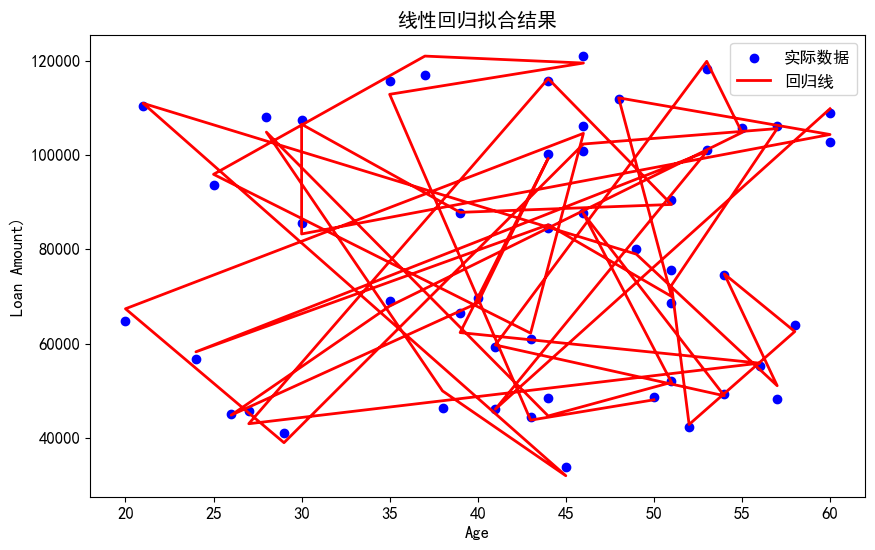

In [32]:
# 7. 可视化结果
# 由于是多特征数据，我们选择一个特征（如年龄）进行可视化
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # Windows 系统使用黑体
matplotlib.rcParams['font.size'] = 12  # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.figure(figsize=(10, 6))
plt.scatter(data["Age"], data["Loan Amount"], color="blue", label="实际数据")
plt.plot(data["Age"], model.predict(X), color="red", linewidth=2, label="回归线")
plt.xlabel("Age")
plt.ylabel("Loan Amount)")
plt.title("线性回归拟合结果")
plt.legend()
plt.show()